## IMPORTING LIBRARY

In [1]:
import tensorflow as tf
import zipfile
import os
import matplotlib.pyplot as plt


from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model

## FILE CONFIGURATION

### Extracting Directory

In [12]:
# os.mkdir('dataset')
dataset_basedir = 'dataset/'

In [13]:
zip_dir = 'archive-dataset/archive(4).zip'
scanning = zipfile.ZipFile(zip_dir, 'r')
scanning.extractall(dataset_basedir)
scanning.close()

### Monitoring File System

In [18]:
print(os.listdir('./'))
print()
print(os.listdir('dataset'))
print()
print(os.listdir('dataset/285 birds'))
print()
print(len(os.listdir('dataset/285 birds/train')))
print(len(os.listdir('dataset/285 birds/test')))
print(len(os.listdir('dataset/285 birds/valid')))

['dataset', 'bird-classification.ipynb', '.ipynb_checkpoints', 'archive-dataset']

['285 birds', 'birds_rev2', 'birds']

['images to test', 'valid', 'Bird Species.csv', 'train', 'EfficientNetB3-birds-98.87.h5', 'test', 'one image to test', 'class_dict.csv']

285
285
285


### Defining Training and Validation Directory

In [4]:
training_dir = 'dataset/285 birds/train'
validation_dir = 'dataset/285 birds/valid'

### Image Preprocessing

In [5]:
train_rule = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    rotation_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True
)

validation_rule = ImageDataGenerator(
    rescale = 1./255
)

In [6]:
train_generator = train_rule.flow_from_directory(
    training_dir,
    class_mode = 'categorical',
    target_size = (150, 150),
    batch_size = 20,
    shuffle = True
)

val_generator = validation_rule.flow_from_directory(
    validation_dir,
    class_mode = 'categorical',
    target_size = (150, 150),
    batch_size = 20,
    shuffle = True
)

Found 40930 images belonging to 285 classes.
Found 1425 images belonging to 285 classes.


## LOAD MODEL

In [7]:
model = load_model('model.h5')

## BUILDING MODEL

In [9]:
# model = Sequential ([
#     Conv2D(16, (3, 3), input_shape = (150, 150, 3), activation = 'relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(32, (3, 3), activation = 'relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3, 3), activation = 'relu'),
#     MaxPooling2D(2, 2),
    
#     Flatten(),
    
#     Dense(128, activation = 'relu'),
#     Dense(285, activation = 'softmax')
# ])

# model.summary()

# model.compile (
#     loss = 'categorical_crossentropy',
#     metrics = ['acc'],
#     optimizer = 'adam'
# )

history = model.fit (
    train_generator,
    epochs = 50,
    validation_data = val_generator
)

Epoch 1/50
2047/2047 [==============================] - 871s 425ms/step - loss: 1.5629 - acc: 0.6116 - val_loss: 1.2502 - val_acc: 0.6863
Epoch 2/50
2047/2047 [==============================] - 824s 402ms/step - loss: 1.5611 - acc: 0.6099 - val_loss: 1.0264 - val_acc: 0.7270
Epoch 3/50
2047/2047 [==============================] - 816s 398ms/step - loss: 1.5583 - acc: 0.6118 - val_loss: 1.0223 - val_acc: 0.7270
Epoch 4/50
2047/2047 [==============================] - 955s 467ms/step - loss: 1.5570 - acc: 0.6114 - val_loss: 0.9319 - val_acc: 0.7565
Epoch 5/50
2047/2047 [==============================] - 1014s 495ms/step - loss: 1.5400 - acc: 0.6129 - val_loss: 1.2135 - val_acc: 0.6961
Epoch 6/50
2047/2047 [==============================] - 952s 465ms/step - loss: 1.5216 - acc: 0.6201 - val_loss: 1.2830 - val_acc: 0.6856
Epoch 7/50
2047/2047 [==============================] - 1035s 506ms/step - loss: 1.5347 - acc: 0.6186 - val_loss: 1.2681 - val_acc: 0.6877
Epoch 8/50
2047/2047 [==========

KeyboardInterrupt: 

### Saving Model

In [14]:
saved_model_path = './model.h5'
model.save(saved_model_path)

## Drawing Graph

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

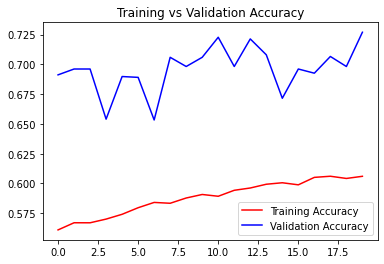

In [12]:
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend(loc=4)
plt.show()

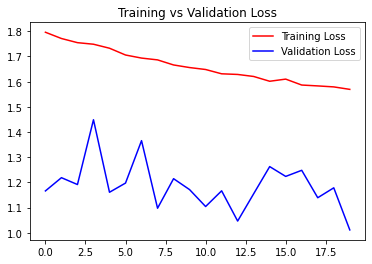

In [13]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.legend(loc=0)
plt.title('Training vs Validation Loss')
plt.show()